[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20Análisis%20Estadístico%20de%20Datos/notebooks/solutions/Practica3_Pandas_answers.ipynb)

# Analizando las estadísticas de jugadores de futbol con Pandas

![FIFA](https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/FIFA_logo_without_slogan.svg/1200px-FIFA_logo_without_slogan.svg.png)

En esta notebook, utilizarás Pandas para analizar datos de jugadores de futbol (soccer). Los datos se encuentran en forma tabular e incluyen información relevante de jugadores de futbol de todo el mundo.

---


Cada fila en el conjunto de datos contiene información sobre el jugador:
* Información personal: Nombre, nacionalidad, , edad, altura, peso y pierna preferida al jugar.
* Información como jugador: Nombre del equipo en el que juega (Club), número de playera, posición en el campo (abreviada), valor comercial y salario.
* Información sobre sus habilidades como jugador (0-100): Overall, Potential, Shooting, Defense, Passing, Physical, Control, Mental y GoalKeeping.


Durante la notebook llevarás a cabo tareas de tratamiento y análisis exploratorio de datos comunmente realizadas. Buscarás información que podría resultar útil para las organizaciones.



---



Recuerda que puedes acudir a la [documentación de Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) o a la notebook de Pandas del diplomado en ciencia de datos.



Primero, importa Pandas en tu notebook:

In [1]:
# pandas usando el alias pd
import pandas as pd

Ejecuta la siguiente celda para cargar el conjunto de datos desde el repositorio en github a la máquina en colab.

In [2]:
# Fetch the dataset using the raw GitHub URL.
#!curl --remote-name \
#     -H 'Accept: application/vnd.github.v3.raw' \
#     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/players.csv

Veamos las primeras líneas del archivo usando un comando de linux en la celda de colab:

In [3]:
#!head -n 5 players.csv

## Carga el conjunto de datos FIFA usando pandas

In [4]:
# leer el dataframe usando read_csv
fifa_df = pd.read_csv("https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/players.csv", sep=',', header=0)
# mostrar los primeros elementos con head
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,€102M,€355K,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


## Características del dataset

¿Qué tipos de datos contiene nuestro dataframe?

In [5]:
for name, t in zip(fifa_df.columns, fifa_df.dtypes):
  print(name, t)
fifa_df.info()

ID int64
Name object
Nationality object
Club object
Jersey Number float64
Value object
Wage object
Age int64
Height object
Weight object
Preferred Foot object
Position object
Overall int64
Potential int64
Shooting float64
Defense float64
Passing float64
Physical float64
Control float64
Mental float64
GoalKeeping float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              18207 non-null  int64  
 1   Name            18207 non-null  object 
 2   Nationality     18207 non-null  object 
 3   Club            17966 non-null  object 
 4   Jersey Number   18147 non-null  float64
 5   Value           18207 non-null  object 
 6   Wage            18207 non-null  object 
 7   Age             18207 non-null  int64  
 8   Height          18159 non-null  object 
 9   Weight          18159 non-null  object 
 10  Preferred Foot  18159 no

¿Qué tamaño tiene nuestro dataset?

Utiliza el método ```shape``` para conocer el número de filas y columnas en el dataframe.

In [6]:
m,n = fifa_df.shape
print(f"Filas: {m}, Columnas: {n}")

Filas: 18207, Columnas: 21


In [7]:
assert m == 18207 and n == 21, "Error en las dimensiones"

### Estadísticas generales del dataset.

Usa ```describre()``` para mostrar las estadísticas generales de las columnas numéricas en el dataframe.

In [8]:
fifa_df.describe()

,ID,Jersey Number,Age,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
count,18207.000000,18147.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,19.546096,25.122206,66.238699,71.307299,47.736274,47.459001,53.710612,64.344512,59.236357,57.958974,16.468087
std,29965.244204,15.947765,4.669943,6.908930,6.136496,15.621702,17.314439,15.113052,9.839120,15.156389,9.933340,17.002775
min,16.000000,1.000000,16.000000,46.000000,48.000000,7.000000,7.000000,8.000000,22.000000,12.000000,25.000000,1.000000
25%,200315.500000,8.000000,21.000000,62.000000,67.000000,39.000000,35.000000,46.000000,60.000000,54.000000,51.000000,10.000000
50%,221759.000000,17.000000,25.000000,66.000000,71.000000,50.000000,52.000000,57.000000,66.000000,63.000000,58.000000,11.000000
75%,236529.500000,26.000000,28.000000,71.000000,75.000000,59.000000,61.000000,64.000000,71.000000,69.000000,65.000000,12.000000
max,246620.000000,99.000000,45.000000,94.000000,95.000000,88.000000,86.000000,92.000000,89.000000,96.000000,95.000000,89.000000


## Tratamiento de datos


### Datos faltantes

Antes de poder hacer transformaciones y operaciones en los datos, es importante identificar la posible existencia de datos faltantes. El método ```isna()``` de pandas, permite obtener un dataframe booleano que identifica entradas faltantes.

Usémos ```isna()```, ```sum(axis=0)``` y ```to_frame().T``` para resumir el resultado de datos faltantes como un conteo por columnas:

In [9]:
fifa_df.isna().sum(axis=0).to_frame().T

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,241,60,0,0,0,48,48,...,60,0,0,48,48,48,48,48,48,48


Una manera de tratar con datos faltantes, es eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.

Ya que para nuestro conjunto de datos la cantidad de faltantes es mínima, podemos usar esta estrategia.

Completa la siguiente celda para eliminar filas (```axis=0```) que contengan algún dato faltante (```dropna```):

In [10]:
fifa_df.columns

Index(['ID', 'Name', 'Nationality', 'Club', 'Jersey Number', 'Value', 'Wage',
       'Age', 'Height', 'Weight', 'Preferred Foot', 'Position', 'Overall',
       'Potential', 'Shooting', 'Defense', 'Passing', 'Physical', 'Control',
       'Mental', 'GoalKeeping'],
      dtype='object')

In [11]:
t_df = fifa_df.dropna(axis=0)

Verifica que no hay más datos faltantes:

In [12]:
empty_columns = t_df.isna().sum(axis=0).to_frame().T
empty_columns

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
assert empty_columns.values.sum() == 0, "Error, aun hay datos faltantes"

Finalmente, reemplazar el dataframe original por el nuevo sin elementos faltantes.

In [14]:
t_df.shape, fifa_df.shape

((17918, 21), (18207, 21))

In [15]:
fifa_df = t_df

### Transformaciones

Las celdas fueron inferidas como tipo ```object``` por pandas. Algunas de éstas contienen datos numéricos que podrían ser útiles para el análisis.

Por ejemplo, las columnas ```Wage``` y ```Value``` contienen datos sobre el salario y el valor en el mercado de cada jugador. Ambas columnas contienen el signo de la moneda (€) al inicio y al final pueden contener la abreviación de cantidades (K miles, M millones).

Debemos realizar un tratamiento de datos en tales columnas para poder usarlas de manera numérica.

Primero, confirmemos que solo tenemos casos donde las cantidades terminan en K, M o sin abreviaturas. Usemos funciones de agregación.

Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Wage```:

In [16]:
fifa_df[["Wage"]].groupby(fifa_df.Wage.str[-1]).count()

,Wage
Wage,
K,17918


Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Value```:

In [17]:
fifa_df[["Value"]].groupby(fifa_df.Value.str[-1]).count()

,Value
Value,
0,11
K,11060
M,6847


In [18]:
def currency_to_numeric(currency):
    """
    La función recibe valores monetarios en un objeto de texto y los transforma:
    1- Elimina el símbolo de la moneda al inicio de la cadena.
    2- Extrae el caracter adicional al final de la cadena que indica el
       múltiplo de la cantidad (abreviatura). No siempre hay un símbolo.
    3- Usa el valor para devolver la cantidad en número (multiplica por el valor).
    
    Ej: "€250K" pasa a 250000, "$1.5M" pasa a 1500000.
    
    1K = 1000
    1M = 1000000
    Si no hay letra, solo se devuelve la parte numérica.
    """
    symbols = {"K": 1000, "M": 1000000}
    
    # Elimina cualquier símbolo de moneda al inicio
    currency = currency.strip("€$£")  # Ajusta según las monedas que manejes
    
    # Verifica si el último carácter es un multiplicador (K o M)
    multiplier = symbols.get(currency[-1], 1)
    
    # Convierte la parte numérica a flotante y multiplica
    numeric = float(currency[:-1]) * multiplier if multiplier != 1 else float(currency)
    
    return numeric

# Pruebas
print(currency_to_numeric("$250K"))  # 250000.0
print(currency_to_numeric("€1.5M"))  # 1500000.0
print(currency_to_numeric("1000£"))   # 1000.0


250000.0
1500000.0
1000.0


Prueba tu función:

In [19]:
currency_to_numeric("$20")

20.0

In [20]:
assert currency_to_numeric("$20") == 20.0 and currency_to_numeric("$50K") == 50*10.0**3 and currency_to_numeric("$10M") == 10*10.0**6, "Error"

Cambia las columnas ```Wage``` y ```Value``` a numéricos usando ```currency_to_numeric``` elemento por elemento con ```applymap```:

In [21]:
fifa_df[["Wage", "Value"]] = fifa_df[["Wage", "Value"]].map(currency_to_numeric)
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


### Suplementando la información

En el set de datos, tenemos una columna ```Position``` que indica la posición en la que el jugador se desempeña en el campo. Algo que podrás notar, es que originalmente la posición está de manera abreviada, si no conoces las abreviaturas, será complicado saber en qué posición juega cada jugador.


Para solucionar esto, usémos otro set de datos para cambiar de abreviatura a algo más descriptivo, pero manteniendo la abreviatura.

La siguiente imágen muestra las posiciónes más comunes en el campo:
![Posiciones de juego](https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/01%20Programaci%C3%B3n%20en%20Python/images/SoccerFieldPositions.png)


Vamos a utilizar un nuevo set de datos que contiene la abreviatura de cada posición (```Abbreviation```) y su significado (```Full```).

Carga el archivo desde github a colab con la siguiente celda:

In [22]:
# Fetch the dataset using the raw GitHub URL.
#!curl --remote-name \
#     -H 'Accept: application/vnd.github.v3.raw' \
#     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/positions.csv

Ejecuta la siguiente celda para crear y ver el nuevo dataframe con los datos de las posiciones:

In [23]:
positions_df = pd.read_csv("https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/positions.csv", header=0, skipinitialspace=True)
positions_df.head()

,Abbreviation,Full
0,GK,Goalkeeper
1,SW,Sweeper
2,CB,Center Back
3,LCB,Left Center Back
4,RCB,Right Center Back


Utiliza el nuevo dataframe para actualizar la columna ```Position``` en el dataframe de jugadores por la posición descriptiva + abreviada.

Primero, debemos de *unir* ambos dataframes, ambos comparten una columna (pero tienen diferentes nombre) la posición abreviada.

Utiliza un método de pandas para unir el dataframe ```fifa_df``` con ```positions_df```.

*Tip: Queremos unir cada fila de la **izquierda** (cada jugador) con una sola fila de la **derecha** (su posición completa en el campo).*

In [24]:
merged_df = fifa_df.merge(positions_df, left_on="Position", right_on="Abbreviation")

In [25]:
merged_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Abbreviation,Full
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,RF,Right Forward
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0,ST,Striker
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0,LW,Left Wing
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0,GK,Goalkeeper
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0,RCM,Right Center Midfield


In [26]:
assert len(merged_df.columns) == 23, "Error"
print("La union de ambos dataframes contiene ", len(merged_df.columns), " columnas")

La union de ambos dataframes contiene  23  columnas


Usemos la nueva columna ```Full``` para actualizar la columna ```Position``` para que contenga el significado y abreviatura de la posición:

```merged_df["Full"] + " (" + merged_df["Position"] +")"```

In [27]:
merged_df["Position"] = merged_df["Full"] + " (" + merged_df["Position"] +")"

Muestra la columna actualizada:

In [28]:
merged_df["Position"].head(3)

0    Right Forward (RF)
1          Striker (ST)
2        Left Wing (LW)
Name: Position, dtype: object

Ahora, tenemos algunas columnas adicionales que ya no son útiles.

Eliminemos las columnas ```Abbreviation``` y ```Full``` del dataframe usando ```drop()```:

In [29]:
merged_df = merged_df.drop(["Abbreviation", "Full"], axis=1)

In [30]:
merged_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,Striker (ST),94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,Left Wing (LW),92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0


In [31]:
assert len(merged_df.columns) == 21, "Error"

Asignemos al dataframe original ```fifa_df``` el nuevo dataframe con el tratamiento de datos ya realizado:

In [32]:
fifa_df = merged_df
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,Striker (ST),94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,Left Wing (LW),92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,Goalkeeper (GK),91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,Right Center Midfield (RCM),91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


## Análisis exploratorio

En esta sección, utilizarás distintos métodos de los dataframes de pandas para generar un análisis exploratorio. En un análisis exploratorio, se busca explorar, resumir y entender los datos.

### Jugadores con el mayor valor comercial y jugadores mejores pagados

Muestra el **Top 3** de jugadores con mayor valor (```Value```) en el mercado.

In [33]:
# Ordenar el DataFrame por el salario ('Wage') en orden descendente y seleccionar los primeros 3 jugadores
top_salario = fifa_df.nlargest(3, 'Value')
top_salario

top_valor = fifa_df.sort_values(by='Value', ascending=False).head(3)
top_valor

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,Left Wing (LW),92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,Right Center Midfield (RCM),91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


Muestra el **Top 3** de jugadores mejores pagados en el mundo (Salarios más altos, ```Wage```).

In [34]:
top_valor = fifa_df.sort_values(by='Wage', ascending=False).head(3)
top_valor

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
7,176580,L. Suárez,Uruguay,FC Barcelona,9.0,80000000.0,455000.0,31,6'0,190lbs,...,Right Side (RS),91,91,86.0,56.0,74.0,81.0,87.0,87.0,31.0
6,177003,L. Modrić,Croatia,Real Madrid,10.0,67000000.0,420000.0,32,5'8,146lbs,...,Right Center Midfield (RCM),91,91,76.0,74.0,89.0,79.0,92.0,89.0,10.0


### Potencial por alcanzar

Utiliza operaciones Crea una nueva columna que  muestre el potencial por alcanzar ```Potential left``` de cada jugador en el conjunto de datos. El potencial por alcanzar puede ser calculado mediante ```Potential - Overall```.

In [35]:
fifa_df["Potential left"] = fifa_df["Potential"] - fifa_df["Overall"]
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0,0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0,1
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0,2
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0,1


### Jóvenes promesa

Utiliza las funciones de Pandas para encontrar el **top 5** de jugadores "promesa" menores de 22 años. Ordena ascendentemente el dataframe según el potencial (```Potential```), potencial por alcanzar (```Potential left```) y su nivel (```Overall ```) actual.

In [36]:
# Filtrar los jugadores menores de 22 años
# Condición para "filtro" de datos que cumpla la condición < 22
jugadores_promesa = fifa_df[fifa_df['Age'] < 22]

# Ordenar los jugadores promesa por potencial (Potential), potencial por alcanzar (Potential left) y su nivel actual (Overall)
top_promesa = jugadores_promesa.sort_values(by=['Potential', 'Potential left', 'Overall'], ascending=[True, True, True])

# Seleccionar los primeros 5 jugadores
top5_promesa = top_promesa.head(5)

# Imprimir el top 5 de jugadores promesa
print("Top 5 de jugadores promesa menores de 22 años:")
print(top5_promesa[['Name', 'Age', 'Potential', 'Potential left', 'Overall']])

Top 5 de jugadores promesa menores de 22 años:
                Name  Age  Potential  Potential left  Overall
17895      D. Horton   18         55               7       48
17567         Wu Wei   21         56               4       52
17858      D. Mackay   21         56               7       49
17670   Lee Dong Hee   21         57               6       51
17689  M. Bloomfield   21         57               6       51


### Mejor defensa en el mundo

Encuentra al jugador con el mayor puntaje en la columna ```Defense```:

*Tip: utiliza el método ```idxmax``` para encontrar la fila donde se encuentra el mejor defensa. Después usa el índice para acceder a los datos de la fila.*

In [37]:
# Suponiendo que tienes un DataFrame llamado 'fifa_df' que contiene los datos de los jugadores

# Utiliza idxmax para encontrar el índice del jugador con el mejor puntaje en la columna 'Defense'
indice_mejor_defensa = fifa_df['Defense'].idxmax()

# Accede a los datos del jugador con el mejor puntaje en 'Defense' utilizando el índice obtenido
mejor_defensa = fifa_df.loc[indice_mejor_defensa]

# Imprime la información del mejor defensa en el mundo
print("Mejor defensa en el mundo:")
print(mejor_defensa[['Name', 'Club', 'Defense', 'Position']])

Mejor defensa en el mundo:
Name                               N. Kanté
Club                                Chelsea
Defense                                86.0
Position    Left Defensive Midfielder (LDM)
Name: 14, dtype: object


### Porcentaje pie preferido

Calcula el porcentaje mundial de jugadores que prefieren utilizar su pierna derecha para controlar el balón y el porcentaje que prefiere utilizar la pierna izquierda.

*Tip: El método ```value_counts()``` de objetos Series podría resultarte particularmente útil para esta tarea.*

In [38]:
# Calcula el conteo de jugadores por cada valor único en la columna 'Preferred Foot'
conteo_pie_pref = fifa_df['Preferred Foot'].value_counts()

# Calcula el porcentaje de jugadores que prefieren utilizar su pierna derecha e izquierda
porcentaje_derecha = (conteo_pie_pref['Right'] / fifa_df.shape[0]) * 100
porcentaje_izquierda = (conteo_pie_pref['Left'] / fifa_df.shape[0]) * 100

# Imprime los resultados
print("Porcentaje de jugadores que prefieren la pierna derecha: {:.2f}%".format(porcentaje_derecha))
print("Porcentaje de jugadores que prefieren la pierna izquierda: {:.2f}%".format(porcentaje_izquierda))

Porcentaje de jugadores que prefieren la pierna derecha: 76.77%
Porcentaje de jugadores que prefieren la pierna izquierda: 23.23%


### Equipos con mayor talento promedio

Utiliza funciones de agregación y de agrupamiento para obtener a los equipos con el mejor promedio de nivel (```Overall```) entre sus jugadores.

In [39]:
# Calcula el promedio de nivel (Overall) para cada equipo
promedio_por_equipo = fifa_df.groupby('Club')['Overall'].mean()

# Ordena los equipos por el promedio de nivel (Overall) en orden descendente
mejores_equipos = promedio_por_equipo.sort_values(ascending=False)

# Muestra los mejores equipos con su promedio de nivel
print("Equipos con el mejor promedio de nivel (Overall):")
print(mejores_equipos.head())

Equipos con el mejor promedio de nivel (Overall):
Club
Juventus       82.280000
Napoli         80.000000
Inter          79.750000
Real Madrid    78.242424
Milan          78.074074
Name: Overall, dtype: float64


### Equipos con más costosos (valor comercial)

Utiliza funciones de agregación y agrupamiento para encontrar el valor total de de cada club, esto es, la suma de los valores individuales de los jugadores de los Club.

Ordena de manera descendente para mostrar los clubs más costosos del mundo.

In [40]:
# Calcula el valor comercial total de cada club sumando los valores individuales de los jugadores
valor_comercial_por_equipo = fifa_df.groupby('Club')['Value'].sum()

# Ordena los equipos por valor comercial total en orden descendente
equipos_mas_costosos = valor_comercial_por_equipo.sort_values(ascending=False)

# Muestra los equipos más costosos con su valor comercial total
print("Equipos más costosos del mundo por valor comercial total:")
print(equipos_mas_costosos.head())

Equipos más costosos del mundo por valor comercial total:
Club
Real Madrid          874425000.0
FC Barcelona         852600000.0
Manchester City      786555000.0
Juventus             704475000.0
FC Bayern München    679025000.0
Name: Value, dtype: float64


### ¿Qué equipos tienen más mexicanos?

Muestra un top 5 de equipos con más jugadores mexicanos en el mundo.

Primero, crea un dataframe que contiene unicamente jugadores mexicanos:

*Tip: Filtra el dataframe usando ```Nationality==Mexico```*.

In [41]:
# Filtra el DataFrame para incluir solo jugadores mexicanos
jugadores_mexicanos = fifa_df[fifa_df['Nationality'] == 'Mexico']

# Calcula el número de jugadores mexicanos en cada equipo
jugadores_por_equipo = jugadores_mexicanos['Club'].value_counts()

# Muestra un top 5 de equipos con más jugadores mexicanos en el mundo
top_equipos_mexicanos = jugadores_por_equipo.head(5)

print("Top 5 de equipos con más jugadores mexicanos en el mundo:")
print(top_equipos_mexicanos)

Top 5 de equipos con más jugadores mexicanos en el mundo:
Club
Guadalajara    29
U.N.A.M.       21
Club Atlas     20
Club Necaxa    20
Querétaro      19
Name: count, dtype: int64


Agrupa por el nombre del club y cuenta:


In [42]:
# Filtra el DataFrame para incluir solo jugadores mexicanos
jugadores_mexicanos = fifa_df[fifa_df['Nationality'] == 'Mexico']

# Agrupa por el nombre del club y cuenta la cantidad de jugadores mexicanos en cada uno
jugadores_por_club = jugadores_mexicanos.groupby('Club').size()

# Muestra el número de jugadores mexicanos por club
print("Número de jugadores mexicanos por club:")
print(jugadores_por_club)

Número de jugadores mexicanos por club:
Club
Atlético Huila                  1
Boyacá Chicó FC                 2
CD Everton de Viña del Mar      4
CD Feirense                     1
Chicago Fire                    1
Club América                   18
Club Atlas                     20
Club León                      18
Club Necaxa                    20
Club Tijuana                   16
Cruz Azul                      16
Deportivo Toluca               17
Eintracht Frankfurt             2
FC Dallas                       1
FC Groningen                    1
FC Porto                        2
Fenerbahçe SK                   1
Guadalajara                    29
LA Galaxy                       2
La Equidad                      1
Lobos BUAP                     16
Los Angeles FC                  1
Monarcas Morelia               17
Monterrey                      16
PSV                             2
Pachuca                        18
Puebla FC                      18
Querétaro                      19
RC 

## Visualización

Utiliza las opciones de visualización de Pandas.

### Histograma de las edades de los jugadores de futbol

Selecciona la columna ``Age``` del dataframe ```fifa_df``` y muestra el histograma usando las opciones de visualización de Pandas:

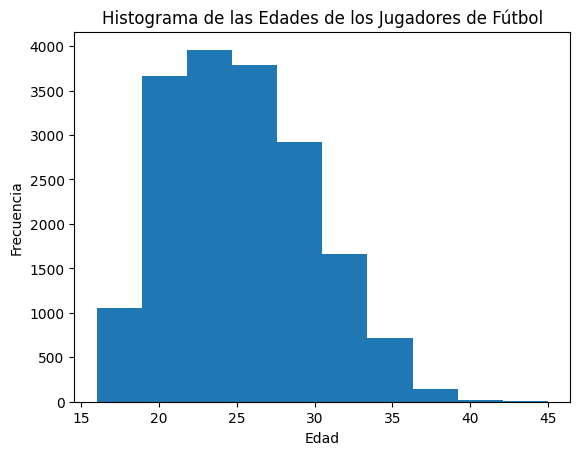

In [43]:
# Suponiendo que tienes un DataFrame llamado 'fifa_df' que contiene los datos de los jugadores
import matplotlib.pyplot as plt

# Muestra el histograma de las edades de los jugadores usando Pandas
fifa_df['Age'].plot.hist(bins=10)

# Agrega etiquetas y título al histograma
plt.title('Histograma de las Edades de los Jugadores de Fútbol')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Muestra el histograma
plt.show()

### Gráfica de Pie (Preferred Foot)

Selecciónes el conteo de valores del pie preferido (columna ```Preferred Foot```) y muestra la información mediante una gráfica de Pie:

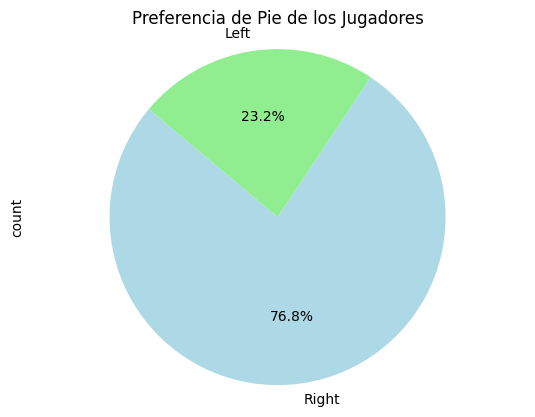

In [44]:
# Calcula el conteo de valores en la columna 'Preferred Foot'
conteo_pie_pref = fifa_df['Preferred Foot'].value_counts()

# Muestra la información en una gráfica de pie
conteo_pie_pref.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=140)

# Agrega título a la gráfica
plt.title('Preferencia de Pie de los Jugadores')

# Muestra la gráfica de pie
plt.axis('equal')  # Para asegurarse de que la gráfica de pie sea un círculo
plt.show()

### Gráfica de dispersión Edad vs Potential left

Ahora, utiliza una gráfica de dispersión para visualizar el comportamiento del potencial por alcanzar (```Potential left```) de acuerdo a las edades de los jugadores:

*Tip: La gráfica debe mostrar la edad en un eje y el potencial por alcanzar en el otro.*

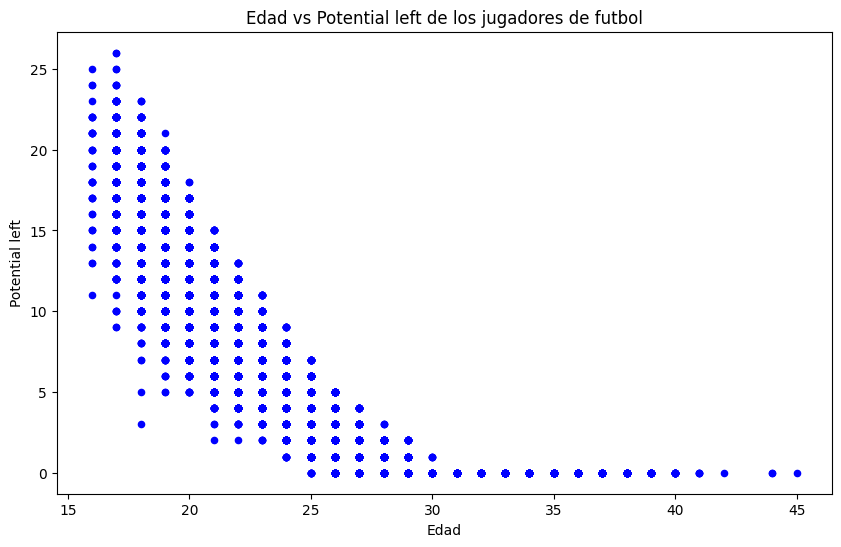

In [45]:
# Gráfica de dispersión Edad vs Potential left
fifa_df.plot.scatter(x='Age', y='Potential left', figsize=(10, 6), color='blue')

# Título y etiquetas de los ejes
plt.title('Edad vs Potential left de los jugadores de futbol')
plt.xlabel('Edad')
plt.ylabel('Potential left')

# Mostrar la gráfica
plt.show()


¿Qué otras variables o mezcla de variables sería interesante visualizar?

# Desafío Adicional

En la práctica con Numpy, creaste un modelo para identificar imágenes de dígitos escritos a mano.

Para este nuevo conjunto de datos, ¿podrías usar una metodología similar para encontrar la posición en el campo de un jugador solamente usando los valores de su habilidades?

Skills: ```Shooting 	Defense 	Passing 	Physical 	Control 	Mental 	GoalKeeping```

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Seleccionar características relevantes
features = ["Shooting", "Defense", "Passing", "Physical", "Control", "Mental", "GoalKeeping"]
df_aux = pd.read_csv("https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/players.csv", sep=',', header=0)
# Eliminar filas con valores nulos en X o y
fifa_cleaned = df_aux[features + ["Position"]].dropna()

# Seleccionar características y etiquetas después de limpiar los datos
X = fifa_cleaned[features]
y = fifa_cleaned["Position"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el clasificador k-NN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Evaluar el modelo utilizando validación cruzada
cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5)
accuracy_knn = cv_scores.mean()

# Predicción de nuevas instancias
new_player_skills = np.array([[70, 65, 75, 80, 85, 70, 60]])  # Habilidades del nuevo jugador
new_player_df = pd.DataFrame(new_player_skills, columns=features)

# Escalar las características del nuevo jugador
new_player_skills_scaled = scaler.transform(new_player_df)

# Predecir la posición del nuevo jugador
predicted_position_knn = knn_classifier.predict(new_player_skills_scaled)[0]

# Imprimir resultados
print(f"Accuracy de k-NN con validación cruzada: {accuracy_knn:.4f}")
print(f"La posición predicha del nuevo jugador es: {predicted_position_knn}")


Accuracy de k-NN con validación cruzada: 0.4167
La posición predicha del nuevo jugador es: CM


In [47]:
# Función para calcular la distancia euclidiana
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Seleccionar características y etiquetas
X = fifa_cleaned[features]
y = fifa_cleaned["Position"]

# División manual 80% entrenamiento, 20% prueba
num_players = len(X)
split_idx = int(0.8 * num_players)
X_train_manual, X_test_manual = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_manual, y_test_manual = y.iloc[:split_idx], y.iloc[split_idx:]

# Obtener posiciones únicas y sus representantes promedio
unique_positions = y_train_manual.unique()
representatives = {pos: X_train_manual.loc[y_train_manual == pos].mean().values for pos in unique_positions}

# Nuevo jugador a clasificar (ejemplo)
new_player = np.array([70, 65, 75, 80, 85, 70, 60])

# Calcular la distancia euclidiana con cada representante de posición
distances = {position: euclidean_distance(new_player, reps) for position, reps in representatives.items()}

# Obtener la posición con la menor distancia euclidiana
predicted_position_euclidean = min(distances, key=distances.get)

# Evaluación de la precisión del método de distancia euclidiana
correct_predictions = sum(
    min({pos: euclidean_distance(X_test_manual.iloc[i].values, reps) for pos, reps in representatives.items()},
        key=lambda x: x[1]) == y_test_manual.iloc[i]
    for i in range(len(X_test_manual))
)
accuracy_euclidean = correct_predictions / len(X_test_manual)

# Imprimir resultados
print(f"Accuracy del método de Distancia Euclidiana: {accuracy_euclidean:.4f}")
print(f"La posición predicha del nuevo jugador es: {predicted_position_euclidean}")

Accuracy del método de Distancia Euclidiana: 0.0466
La posición predicha del nuevo jugador es: LF


# **Clasificación de Posiciones en Fútbol usando k-NN y Distancia Euclidiana Manual**

## **Introducción**
El objetivo de este ejercicio es clasificar a jugadores de fútbol en diferentes posiciones basándonos en sus atributos técnicos y físicos. Implementamos dos métodos distintos:

1. **k-Nearest Neighbors (k-NN) con `sklearn`**: Un enfoque basado en aprendizaje supervisado que clasifica jugadores en función de los k vecinos más cercanos.
2. **Distancia Euclidiana Manual**: Un enfoque más rudimentario que asigna la posición según la distancia a valores promedio predefinidos para cada posición.

Cada método tiene ventajas y desventajas, aquí te explico sus diferencias, los resultados obtenidos y discutiremos posibles mejoras.

---

## **¿Por qué usar k-NN en este ejercicio?**
El algoritmo **k-Nearest Neighbors (k-NN)** es un clasificador basado en la similitud entre ejemplos previos. Funciona bien en problemas donde las clases tienen cierta continuidad en el espacio de características. En el fútbol, las posiciones de los jugadores pueden agruparse según atributos como "Shooting", "Defense", "Passing", etc.

**Razones para usar k-NN:**
- **Es no paramétrico**: No asume una relación específica entre las variables.
- **Es intuitivo**: Clasifica con base en ejemplos previos, imitando la toma de decisiones humana.
- **Se adapta bien a problemas multiclase**: En el fútbol hay múltiples posiciones y k-NN permite encontrar similitudes basadas en características cuantificables.
- **Es robusto ante datos no lineales**: No asume que las clases sean separables linealmente.

### **¿Por qué `k=5` en k-NN?**
El parámetro **`n_neighbors`** define cuántos vecinos cercanos consideramos para clasificar un nuevo jugador. Elegimos `k=5` porque:

- **Evita sensibilidad al ruido**: Si \( k=1 \), el modelo puede sobreajustarse a valores atípicos.
- **Promueve estabilidad en la predicción**: Si \( k \) es demasiado grande, la clasificación puede volverse demasiado general.
- **Regla general**: Un valor de \( k \) entre **3 y 7** es comúnmente utilizado en problemas de clasificación.

Para encontrar el valor óptimo de \( k \), podríamos hacer **validación cruzada** y probar diferentes valores, buscando el que maximice la precisión.

---

## **¿Por qué normalizar los datos antes de aplicar k-NN?**
El modelo k-NN se basa en la distancia entre puntos en el espacio de características. Algunas características como "Physical" pueden tener valores más altos en comparación con "Shooting" o "Mental". Si no escalamos los datos, los atributos con valores más grandes dominarán el cálculo de la distancia.

Por eso usamos **`StandardScaler()`** de `sklearn`, que transforma cada característica para que tenga:
- **Media = 0**
- **Desviación estándar = 1**

Esto garantiza que cada característica contribuya equitativamente a la clasificación.

---

## **Distancia Euclidiana Manual**
La **distancia euclidiana** entre dos puntos \( p \) y \( q \) en un espacio de \( n \) dimensiones se define como:

$$
d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
$$

### **¿Cómo funciona este método en este ejercicio?**
1. Calculamos el **promedio** de los atributos para cada posición en el conjunto de entrenamiento.
2. Para un nuevo jugador, calculamos la distancia euclidiana con respecto a cada posición promedio.
3. La posición con la menor distancia se asigna al jugador.

Este método es una versión simplificada de **k-NN con k=1**, donde solo tomamos un representante de cada clase.

---

## **Comparación entre ambos métodos**
| Método                | Ventajas | Desventajas |
|----------------------|-----------|-------------|
| **k-NN con `sklearn`**  | Mayor precisión. Considera múltiples vecinos. Permite validación cruzada. | Computacionalmente más costoso en grandes datasets. |
| **Distancia Euclidiana Manual** | Simplicidad y rapidez. No requiere librerías especializadas. | No es flexible, depende de valores fijos representativos de cada posición. |

---

## **Análisis de los Resultados**
Veamos los resultados obtenidos en cada método:

### **1. k-NN con `sklearn`**
- **Precisión del modelo con validación cruzada**: 41.67%
- **Predicción para un nuevo jugador**: `CM` (Centrocampista)

#### **¿Por qué esta precisión?**
- El modelo usa **múltiples vecinos** para hacer predicciones, lo que suaviza el impacto del ruido en los datos.
- Sin embargo, una precisión del **41.67%** sugiere que las posiciones no están claramente separadas en el espacio de características. Esto podría deberse a que algunos atributos no son suficientes para definir una posición única.

#### **¿Cómo mejorar la precisión?**
- **Probar diferentes valores de `k`** con validación cruzada.
- **Agregar más características** que puedan mejorar la separación entre posiciones.
- **Probar modelos más avanzados** como SVM, Random Forest o redes neuronales.

---

### **2. Distancia Euclidiana Manual**
- **Precisión del método manual**: **4.66%**
- **Predicción para un nuevo jugador**: `LF` (Lateral Izquierdo)

#### **¿Por qué la precisión es tan baja?**
- Este método **no utiliza múltiples vecinos**, sino un único valor promedio por posición, lo cual es una **gran limitación**.
- **No considera la variabilidad dentro de cada posición**. Algunos jugadores en la misma posición pueden tener atributos muy diferentes.
- **No usa normalización**, lo que sesga la distancia en favor de las características con valores más altos.
- La distribución de los datos puede ser **no lineal**, lo que significa que calcular solo una distancia euclidiana no es suficiente para capturar patrones más complejos.

#### **¿Cómo mejorar este método?**
- **Agrupar jugadores con clustering** (k-Means, DBSCAN *(**Density-Based Spatial Clustering of Applications with Noise**)*) para encontrar grupos naturales en lugar de promedios fijos.
- **Usar pesos en la distancia euclidiana** para dar más importancia a ciertas características.
- **Incorporar normalización** antes de calcular las distancias.

---

## **Conclusión**
| Método | Precisión | Recomendado para |
|--------|-----------|------------------|
| **k-NN con `sklearn`** | 41.67% | Clasificación en conjuntos de datos más grandes con muchas instancias. |
| **Distancia Euclidiana Manual** | 4.66% | Una aproximación rápida y educativa, pero no práctica para clasificación real. |

En resumen:
- **k-NN es superior** porque considera múltiples vecinos y usa validación cruzada.
- **La distancia euclidiana manual es demasiado simple** y no captura la variabilidad dentro de cada posición.
- **La normalización es clave** para evitar que ciertas características dominen el cálculo de distancias.
- Para mejorar la clasificación, podríamos **probar otros modelos supervisados** como SVM o Random Forest.

Este ejercicio demuestra la importancia de elegir la técnica adecuada para cada problema, y cómo pequeños ajustes como la normalización pueden hacer una gran diferencia en los resultados.

